<a href="https://colab.research.google.com/github/lcbjrrr/quantai/blob/main/A5_Py_Proc_Clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning

Data cleaning is the often-overlooked but crucial first step in any data analysis project. Think of it as preparing ingredients before cooking a gourmet meal. Raw data, like unwashed vegetables, can contain errors, inconsistencies, and missing values. These imperfections can lead to inaccurate and misleading results. Data cleaning involves identifying and correcting these issues, ensuring that your data is reliable and ready for analysis. This process might include tasks like handling missing values, removing duplicates, and standardizing formats. By taking the time to clean your data, you can build more robust models, draw more accurate conclusions, and ultimately make better decisions.

# Data Types and Conversions

This dataset contains information about insurance claims. Each row represents an individual claim, providing details such as:

- **Gender**: The gender of the policyholder.
- **Age**: The age of the policyholder.
- **Annual_Income**: The annual income of the policyholder.
- **Policy_Type**: The type of insurance policy (Life, Health, Auto, or Home).
- **Claim_Amount**: The monetary value of the claim.
- **Claim_date**: The date the claim was filed.
- **Study**: The highest level of education attained by the policyholder.

This dataset can be used to analyze various aspects of insurance claims, such as the relationship between age, income, and claim amount, or the distribution of claims across different policy types.

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/quantai/refs/heads/main/datasets/insurance_claims.csv')
df.head()

,Gender,Age,Annual_Income,Policy_Type,Claim_Amount,Claim_date,Study
0,Male,25.0,50000,Life,2000.00,20/8/2022,high-school
1,Female,30.0,60000,Health,3568.96,20/8/2022,college
2,Female,35.0,65000,Auto,3000.00,20/8/2022,university
3,Male,29.0,72000,Home,3568.96,20/8/2022,college
4,Male,16.0,72000,Home,3568.96,20/8/2022,mid-school


The df.info() method provides a concise summary of your DataFrame, including the number of rows and columns, data types, and missing values. It's a valuable tool for understanding your data's structure and identifying potential issues before analysis.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         151 non-null    object 
 1   Age            168 non-null    float64
 2   Annual_Income  187 non-null    object 
 3   Policy_Type    158 non-null    object 
 4   Claim_Amount   130 non-null    float64
 5   Claim_date     158 non-null    object 
 6   Study          188 non-null    object 
dtypes: float64(2), object(5)
memory usage: 10.4+ KB


## Date type

By converting the data to a datetime format, we enable Python to perform various operations, such as:

- Calculating time differences: Determine the time elapsed between claim dates.
- Extracting specific date components: Extract year, month, day, or weekday from dates.
- Filtering data based on date ranges: Select claims within a specific time period.
- Creating visualizations: Plot trends over time, such as the number of claims per month.

In essence, converting the 'Claim_date' column to a datetime format unlocks its full potential for analysis and insights.

In [ ]:
df['Claim_date'] = pd.to_datetime(df['Claim_date'], format='%d/%m/%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Gender         151 non-null    object        
 1   Age            168 non-null    float64       
 2   Annual_Income  187 non-null    object        
 3   Policy_Type    158 non-null    object        
 4   Claim_Amount   130 non-null    float64       
 5   Claim_date     158 non-null    datetime64[ns]
 6   Study          188 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 10.4+ KB


# Type Error

To filter rows with typos, you can use string-based filtering, regular expressions, custom functions, or statistical outlier detection. The best approach depends on the specific typo and data context. Consider data cleaning and iterative filtering for accurate results.

In [ ]:
df[df['Annual_Income']=='no income']

,Gender,Age,Annual_Income,Policy_Type,Claim_Amount,Claim_date,Study
65,Female,45.0,no income,Auto,1500.0,2022-03-01,masters
69,Female,45.0,no income,Auto,1500.0,2022-03-01,masters
73,Female,45.0,no income,Auto,1500.0,2022-03-01,masters
77,Female,45.0,no income,Auto,1500.0,2022-03-01,masters
81,Female,45.0,no income,Auto,1500.0,2022-03-01,masters
85,Female,45.0,no income,Auto,1500.0,2022-03-01,masters
93,Female,45.0,no income,Auto,1500.0,2022-03-01,masters
97,Female,45.0,no income,Auto,1500.0,2022-03-01,masters
101,Female,45.0,no income,Auto,NaN,2022-03-01,masters
170,Female,45.0,no income,Auto,NaN,2022-03-01,masters


First we are going to filter the DataFrame df to remove rows where the Annual_Income column has the value 'no income'. This is a common data cleaning step to ensure that the Annual_Income column only contains numeric values.

Then we will convert the Annual_Income column to a floating-point number format (float64). This is necessary for performing numerical calculations and statistical analysis on the income data. By converting the column to a numeric type, you can calculate averages, standard deviations, and other statistical measures.

In [ ]:
df = df[df['Annual_Income']!='no income']

df['Annual_Income'] = df['Annual_Income'].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178 entries, 0 to 187
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Gender         141 non-null    object        
 1   Age            158 non-null    float64       
 2   Annual_Income  177 non-null    float64       
 3   Policy_Type    148 non-null    object        
 4   Claim_Amount   122 non-null    float64       
 5   Claim_date     148 non-null    datetime64[ns]
 6   Study          178 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 11.1+ KB


<ipython-input-231-890e78370fe4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Annual_Income'] = df['Annual_Income'].astype('float64')


# Missing Values

Missing values, or missing data, are gaps in your dataset. They can be identified using the isnull() function and handled through deletion, imputation, or advanced techniques like multiple imputation. The best approach depends on the extent and nature of the missing data.

In [ ]:
nulls = df.isnull()
nulls

,Gender,Age,Annual_Income,Policy_Type,Claim_Amount,Claim_date,Study
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
183,False,False,False,False,False,True,False
184,False,False,False,False,True,True,False
185,False,False,False,False,True,True,False
186,False,False,False,False,False,False,False


`nulls.sum()` is a concise way to calculate the total number of missing values in a DataFrame or Series. It effectively counts the occurrences of NaN or None values across all rows and columns, providing a quick overview of data quality. This information is crucial for data cleaning and preprocessing, as it helps identify areas where imputation or deletion might be necessary.

In [ ]:
nulls.sum()


,0
Gender,37
Age,20
Annual_Income,1
Policy_Type,30
Claim_Amount,56
Claim_date,30
Study,0


`dropna()` is a powerful function in Python's Pandas library used to remove rows or columns containing missing values. By default, it removes rows with any missing values. By understanding and effectively using dropna(), you can ensure data quality and improve the reliability of your analysis.

In [ ]:
df.dropna()

,Gender,Age,Annual_Income,Policy_Type,Claim_Amount,Claim_date,Study
0,Male,25.0,50000.0,Life,2000.00,2022-08-20,high-school
1,Female,30.0,60000.0,Health,3568.96,2022-08-20,college
2,Female,35.0,65000.0,Auto,3000.00,2022-08-20,university
3,Male,29.0,72000.0,Home,3568.96,2022-08-20,college
4,Male,16.0,72000.0,Home,3568.96,2022-08-20,mid-school
5,Female,43.0,65000.0,Auto,3000.00,2022-08-20,illiterate
6,Male,22.0,44444.0,Life,2100.00,2022-08-20,high-school
7,Female,33.0,60000.0,Health,2800.00,2022-08-20,college
8,Female,41.0,66666.0,Auto,3150.00,2022-08-20,university
9,Male,40.0,72000.0,Home,3640.00,2022-08-20,college


`fillna()` is a versatile function in Pandas used to fill missing values in a DataFrame. It allows you to replace missing values with specific values, such as a constant, the mean, median, or mode of the column, or values from another column. By strategically using fillna(), you can handle missing data effectively, ensuring data completeness and improving the accuracy of your analysis.

It offers a variety of options to fill missing values:
- Constant Value: Replace missing values with a specific value, such as 0, -1, or a custom string.
- Mean, Median, or Mode: Use the central tendency of the column to fill missing values.
- Forward or Backward Fill: Propagate the last observed value forward or backward.
- Interpolation: Estimate missing values based on neighboring values.
- Values from Another Column: Use values from a different column to fill missing values.

In [ ]:
avg_claim = df[df['Claim_Amount']>0]['Claim_Amount'].mean()
print(avg_claim)
df['Claim_Amount'] = df['Claim_Amount'].fillna(avg_claim)
df


4515.131555555556


<ipython-input-235-aa5123b645ad>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Claim_Amount'] = df['Claim_Amount'].fillna(avg_claim)


,Gender,Age,Annual_Income,Policy_Type,Claim_Amount,Claim_date,Study
0,Male,25.0,50000.0,Life,2000.000000,2022-08-20,high-school
1,Female,30.0,60000.0,Health,3568.960000,2022-08-20,college
2,Female,35.0,65000.0,Auto,3000.000000,2022-08-20,university
3,Male,29.0,72000.0,Home,3568.960000,2022-08-20,college
4,Male,16.0,72000.0,Home,3568.960000,2022-08-20,mid-school
...,...,...,...,...,...,...,...
183,Male,50.0,120000.0,Home,0.000000,NaT,doctorate
184,Male,50.0,120000.0,Home,4515.131556,NaT,doctorate
185,Male,50.0,120000.0,Home,4515.131556,NaT,doctorate
186,Male,25.0,50000.0,Life,2000.000000,2022-08-20,high-school


`loc` is a powerful tool for accessing and modifying specific rows and columns in a Pandas DataFrame. To change cell values using loc, you can specify the row and column labels

In [ ]:
df.loc[df['Claim_Amount'] <= 0, 'Claim_Amount']=avg_claim
df

,Gender,Age,Annual_Income,Policy_Type,Claim_Amount,Claim_date,Study
0,Male,25.0,50000.0,Life,2000.000000,2022-08-20,high-school
1,Female,30.0,60000.0,Health,3568.960000,2022-08-20,college
2,Female,35.0,65000.0,Auto,3000.000000,2022-08-20,university
3,Male,29.0,72000.0,Home,3568.960000,2022-08-20,college
4,Male,16.0,72000.0,Home,3568.960000,2022-08-20,mid-school
...,...,...,...,...,...,...,...
183,Male,50.0,120000.0,Home,4515.131556,NaT,doctorate
184,Male,50.0,120000.0,Home,4515.131556,NaT,doctorate
185,Male,50.0,120000.0,Home,4515.131556,NaT,doctorate
186,Male,25.0,50000.0,Life,2000.000000,2022-08-20,high-school


`df = df.dropna()` removes rows from a Pandas DataFrame that contain any missing values. Missing values are typically represented as NaN (Not a Number). By default, this operation removes entire rows if any value within that row is missing. This is useful for cleaning data and ensuring data integrity, as missing values can often lead to errors or biases in subsequent analysis.

In [ ]:
df = df.dropna()
print(df.shape)
df

(60, 7)


,Gender,Age,Annual_Income,Policy_Type,Claim_Amount,Claim_date,Study
0,Male,25.0,50000.0,Life,2000.000000,2022-08-20,high-school
1,Female,30.0,60000.0,Health,3568.960000,2022-08-20,college
2,Female,35.0,65000.0,Auto,3000.000000,2022-08-20,university
3,Male,29.0,72000.0,Home,3568.960000,2022-08-20,college
4,Male,16.0,72000.0,Home,3568.960000,2022-08-20,mid-school
5,Female,43.0,65000.0,Auto,3000.000000,2022-08-20,illiterate
6,Male,22.0,44444.0,Life,2100.000000,2022-08-20,high-school
7,Female,33.0,60000.0,Health,2800.000000,2022-08-20,college
8,Female,41.0,66666.0,Auto,3150.000000,2022-08-20,university
9,Male,40.0,72000.0,Home,3640.000000,2022-08-20,college


## Duplicates

`df.duplicated()` is a Pandas function that identifies duplicate rows in a DataFrame. It returns a boolean Series indicating whether each row is a duplicate or not. By default, it considers all columns to determine duplicates. Then `df.duplicated().sum()` is a Pandas function that identifies duplicate rows in a DataFrame. It returns a boolean Series indicating whether each row is a duplicate or not. By default, it considers all columns to determine duplicates.

In [ ]:
print(df.duplicated().sum())


20


`df[df.duplicated()]` filters the DataFrame to only include the duplicate rows. This is useful for identifying and analyzing redundant data.

In [ ]:

df[df.duplicated()]

,Gender,Age,Annual_Income,Policy_Type,Claim_Amount,Claim_date,Study
121,Female,30.0,60000.0,Health,4515.131556,2022-02-20,college
126,Male,2.0,72000.0,Home,4515.131556,2022-08-20,mid-school
127,Female,30.0,60000.0,Health,4515.131556,2022-02-20,college
132,Male,29.0,72000.0,Home,4515.131556,2022-08-20,college
133,Female,30.0,60000.0,Health,4515.131556,2022-02-20,college
138,Male,29.0,72000.0,Home,4515.131556,2022-08-20,college
139,Female,30.0,60000.0,Health,4515.131556,2022-02-20,college
144,Male,29.0,72000.0,Home,4515.131556,2022-08-20,college
145,Female,30.0,60000.0,Health,4515.131556,2022-02-20,college
150,Male,29.0,72000.0,Home,4515.131556,2022-08-20,college


`df.drop_duplicates(inplace=True)`removes duplicate rows from a DataFrame and modifies the DataFrame in-place, meaning the original DataFrame is changed directly. This is a common data cleaning step to ensure data integrity and avoid issues caused by redundant information.

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

<ipython-input-240-abad02d476d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


(40, 7)

# Outliers

The line in the boxplot represents the middle 50% of the data, from Q1 to Q3. The line inside the box is the median. The whiskers extend from the box to the minimum and maximum values, 1  but often they are limited to a certain range to exclude outliers. Outliers are data points that are significantly different from the rest of the data and are often plotted as individual points beyond the whiskers.

<Axes: >

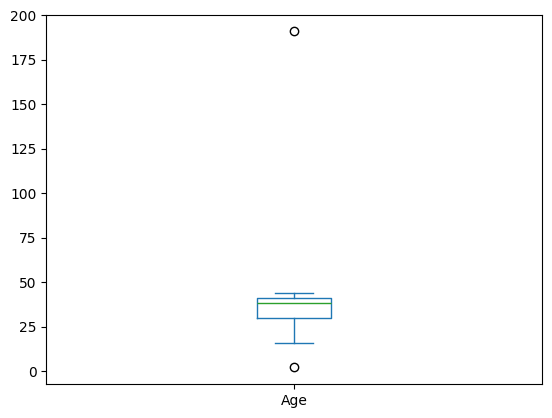

In [ ]:
df['Age'].plot.box()

Quartiles divide a dataset into four equal parts. There are three main quartiles:

- First Quartile (Q1): 25% of the data falls below this value.
- Second Quartile (Q2): Also known as the median, 50% of the data falls below this value.
- Third Quartile (Q3): 75% of the data falls below this value.

Quartiles are used to understand the spread and distribution of data, particularly in box plots.


In [ ]:
df['Age'].describe()

,Age
count,40.000000
mean,38.525000
std,26.282477
min,2.000000
25%,29.750000
50%,38.500000
75%,41.000000
max,191.000000


The `clip()` function can handle outliers in the 'Age' column using the Interquartile Range (IQR) method. It calculates the lower and upper bounds based on the IQR and then clips the values to these bounds, effectively removing outliers.

In [ ]:
q1=29.75
q3=41
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
print(lower_bound,upper_bound)
df['Age'] = df['Age'].clip(lower=lower_bound, upper=upper_bound)
df

12.875 57.875


<ipython-input-243-a7fbfa3af1e2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df['Age'].clip(lower=lower_bound, upper=upper_bound)


,Gender,Age,Annual_Income,Policy_Type,Claim_Amount,Claim_date,Study
0,Male,25.000,50000.0,Life,2000.000000,2022-08-20,high-school
1,Female,30.000,60000.0,Health,3568.960000,2022-08-20,college
2,Female,35.000,65000.0,Auto,3000.000000,2022-08-20,university
3,Male,29.000,72000.0,Home,3568.960000,2022-08-20,college
4,Male,16.000,72000.0,Home,3568.960000,2022-08-20,mid-school
5,Female,43.000,65000.0,Auto,3000.000000,2022-08-20,illiterate
6,Male,22.000,44444.0,Life,2100.000000,2022-08-20,high-school
7,Female,33.000,60000.0,Health,2800.000000,2022-08-20,college
8,Female,41.000,66666.0,Auto,3150.000000,2022-08-20,university
9,Male,40.000,72000.0,Home,3640.000000,2022-08-20,college


# Encoding

## Label encoding.

Label encoding converts categorical variables into numerical format. It assigns a unique integer to each category. However, it can introduce an arbitrary order, which might not be suitable for all cases.

In [ ]:
df['Study'] = df['Study'].map({'illiterate':0,'mid-school':8,'high-school': 12, 'college': 14, 'university': 16})
df

<ipython-input-244-0a0b9781eb63>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Study'] = df['Study'].map({'illiterate':0,'mid-school':8,'high-school': 12, 'college': 14, 'university': 16})


,Gender,Age,Annual_Income,Policy_Type,Claim_Amount,Claim_date,Study
0,Male,25.000,50000.0,Life,2000.000000,2022-08-20,12
1,Female,30.000,60000.0,Health,3568.960000,2022-08-20,14
2,Female,35.000,65000.0,Auto,3000.000000,2022-08-20,16
3,Male,29.000,72000.0,Home,3568.960000,2022-08-20,14
4,Male,16.000,72000.0,Home,3568.960000,2022-08-20,8
5,Female,43.000,65000.0,Auto,3000.000000,2022-08-20,0
6,Male,22.000,44444.0,Life,2100.000000,2022-08-20,12
7,Female,33.000,60000.0,Health,2800.000000,2022-08-20,14
8,Female,41.000,66666.0,Auto,3150.000000,2022-08-20,16
9,Male,40.000,72000.0,Home,3640.000000,2022-08-20,14


## One-hot encoding

One-hot encoding is a technique used to convert categorical variables into numerical format suitable for machine learning algorithms. It creates a new binary column for each category. If a data point belongs to a category, the corresponding column is assigned a value of 1, otherwise, it's 0.

This method avoids introducing an arbitrary order among categories, unlike label encoding. However, it can increase the dimensionality of the dataset, especially when dealing with many categories.

In [ ]:
pd.get_dummies(df['Gender'])

,Female,Male
0,False,True
1,True,False
2,True,False
3,False,True
4,False,True
5,True,False
6,False,True
7,True,False
8,True,False
9,False,True


When one-hot encoding a binary categorical variable like 'Gender' (typically with two categories: Male and Female), you only need one of the two generated columns. This is because the two columns are perfectly correlated: if a data point is not one category, it must be the other. This can lead to **multicollinearity** issues in statistical models, which can negatively impact model performance. `pd.get_dummies(df['Gender'], drop_first=True)`

In [ ]:

df['is_male'] = df['Gender']=='Male'
df = df.drop(columns=['Gender'])
df

<ipython-input-246-990685981eec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_male'] = df['Gender']=='Male'


,Age,Annual_Income,Policy_Type,Claim_Amount,Claim_date,Study,is_male
0,25.000,50000.0,Life,2000.000000,2022-08-20,12,True
1,30.000,60000.0,Health,3568.960000,2022-08-20,14,False
2,35.000,65000.0,Auto,3000.000000,2022-08-20,16,False
3,29.000,72000.0,Home,3568.960000,2022-08-20,14,True
4,16.000,72000.0,Home,3568.960000,2022-08-20,8,True
5,43.000,65000.0,Auto,3000.000000,2022-08-20,0,False
6,22.000,44444.0,Life,2100.000000,2022-08-20,12,True
7,33.000,60000.0,Health,2800.000000,2022-08-20,14,False
8,41.000,66666.0,Auto,3150.000000,2022-08-20,16,False
9,40.000,72000.0,Home,3640.000000,2022-08-20,14,True


`pd.get_dummies()` is a powerful function in Pandas used to perform one-hot encoding on categorical variables. It converts categorical data into numerical format, suitable for machine learning algorithms.

In [ ]:
df = pd.get_dummies(df, columns=['Policy_Type'])
df

,Age,Annual_Income,Claim_Amount,Claim_date,Study,is_male,Policy_Type_Auto,Policy_Type_Health,Policy_Type_Home,Policy_Type_Life
0,25.000,50000.0,2000.000000,2022-08-20,12,True,False,False,False,True
1,30.000,60000.0,3568.960000,2022-08-20,14,False,False,True,False,False
2,35.000,65000.0,3000.000000,2022-08-20,16,False,True,False,False,False
3,29.000,72000.0,3568.960000,2022-08-20,14,True,False,False,True,False
4,16.000,72000.0,3568.960000,2022-08-20,8,True,False,False,True,False
5,43.000,65000.0,3000.000000,2022-08-20,0,False,True,False,False,False
6,22.000,44444.0,2100.000000,2022-08-20,12,True,False,False,False,True
7,33.000,60000.0,2800.000000,2022-08-20,14,False,False,True,False,False
8,41.000,66666.0,3150.000000,2022-08-20,16,False,True,False,False,False
9,40.000,72000.0,3640.000000,2022-08-20,14,True,False,False,True,False


# Scaling


 | **Aspect**              | **Standardization (Z-scores)**                     | **Normalization (Min-Max Scaling)**         |
 |-------------------------|---------------------------------------------------|---------------------------------------------|
 | **Formula**             | $\frac{X-\mu}{\sigma}$                            | $\frac{(X-X_{min})}{(X_{max}-X_{min})}$     |
 | **Output Range**        | No fixed range (depends on data distribution).    | Fixed range (e.g., [0, 1]).                |
 | **Effect on Outliers**  | Less sensitive to outliers.                      | Sensitive to outliers.                     |
 | **When to Use**         | - Data follows Gaussian distribution.            | - Data does **not** follow Gaussian distribution. |
 | **Applications**        | - Distance-based models (SVM, PCA).              | - Models requiring bounded values (NNs).   |

 ---

Support Vector Regression (SVR) model to predict claim amounts based on age and annual income. It uses the RBF kernel to fit the model to the training data. Finally, the model's performance is evaluated using the score method.

In [ ]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf', C=1000, gamma=0.0005)
svr.fit(df[['Age', 'Annual_Income']], df['Claim_Amount'])
svr.score(df[['Age', 'Annual_Income']], df['Claim_Amount'])



0.6420086040032309


 ---

# Normalization


Normalization is a data preprocessing technique used to scale numerical features in a dataset to a common range, typically between 0 and 1. This is important because many machine learning algorithms are sensitive to the scale of the input features. If features have different scales, it can lead to biased results.

<Axes: >

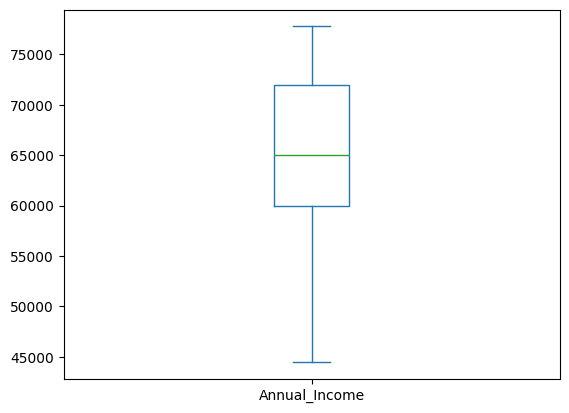

In [ ]:
df['Annual_Income'].plot.box()


MinMaxScaler is a class in scikit-learn that implements min-max normalization. It scales features to a specific range, typically between 0 and 1.

<Axes: >

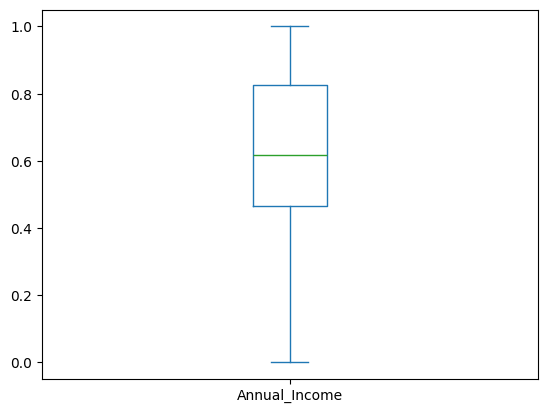

In [ ]:

from sklearn.preprocessing import MinMaxScaler
df['Annual_Income'] = MinMaxScaler().fit_transform(df[['Annual_Income']])
df['Annual_Income'].plot.box()

# Standardization

Standardization, also known as Z-score normalization, is a data preprocessing technique that transforms data into a common scale with a mean of 0 and a standard deviation of 1. This is useful when features have different scales, as it ensures that no feature dominates the learning process.

1


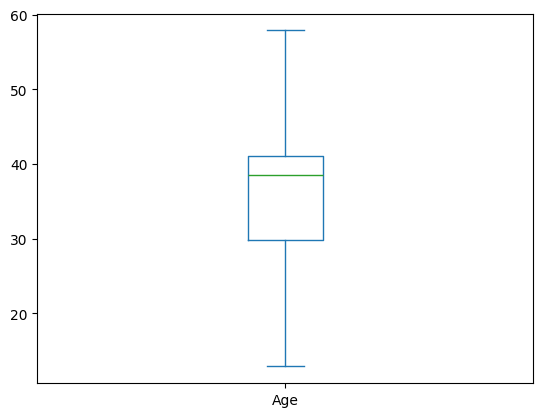

In [ ]:
df['Age'].plot.box()
print(1)

StandardScaler is a class in scikit-learn that implements standardization. It transforms features by subtracting the mean and dividing by the standard deviation.

<Axes: >

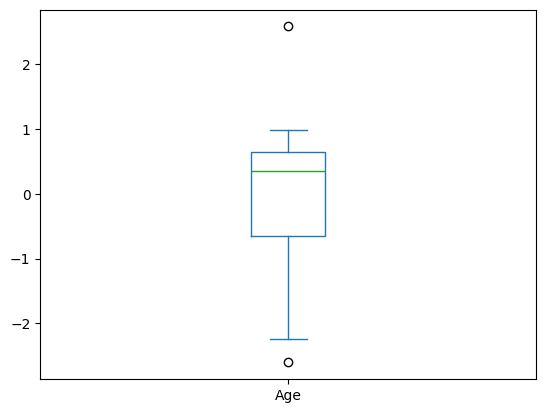

In [ ]:
from sklearn.preprocessing import StandardScaler
df['Age'] = StandardScaler().fit_transform(df[['Age']])
df['Age'].plot.box()

Re-train and measure the score with the re-scaled features...

In [ ]:
svr = SVR(kernel='rbf', C=10000000, gamma=0.5)
svr.fit(df[['Age', 'Annual_Income']], df['Claim_Amount'])
svr.score(df[['Age', 'Annual_Income']], df['Claim_Amount'])


0.7614063431485832


When to use:

 - **Use Standardization**:
   - When your algorithm assumes normally distributed data (e.g., logistic regression, linear regression).
   - When the range of values doesn’t matter, but scale and variability do.
  
 - **Use Normalization**:
   - When you need to bound values (e.g., for neural networks).
   - When working with features with varying units/scales that don't follow a Gaussian distribution.


In [ ]:
df

,Age,Annual_Income,Claim_Amount,Claim_date,Study,is_male,Policy_Type_Auto,Policy_Type_Health,Policy_Type_Home,Policy_Type_Life
0,-1.205618,0.166682,2000.000000,2022-08-20,12,True,False,False,False,True
1,-0.629800,0.466685,3568.960000,2022-08-20,14,False,False,True,False,False
2,-0.053983,0.616686,3000.000000,2022-08-20,16,False,True,False,False,False
3,-0.744964,0.826688,3568.960000,2022-08-20,14,True,False,False,True,False
4,-2.242090,0.826688,3568.960000,2022-08-20,8,True,False,False,True,False
5,0.867325,0.616686,3000.000000,2022-08-20,0,False,True,False,False,False
6,-1.551109,0.000000,2100.000000,2022-08-20,12,True,False,False,False,True
7,-0.284310,0.466685,2800.000000,2022-08-20,14,False,False,True,False,False
8,0.636998,0.666667,3150.000000,2022-08-20,16,False,True,False,False,False
9,0.521835,0.826688,3640.000000,2022-08-20,14,True,False,False,True,False


Working with all variables ...

In [ ]:
X = df.drop(columns=['Claim_Amount','Claim_date'])
y = df['Claim_Amount']
X

,Age,Annual_Income,Study,is_male,Policy_Type_Auto,Policy_Type_Health,Policy_Type_Home,Policy_Type_Life
0,-1.205618,0.166682,12,True,False,False,False,True
1,-0.629800,0.466685,14,False,False,True,False,False
2,-0.053983,0.616686,16,False,True,False,False,False
3,-0.744964,0.826688,14,True,False,False,True,False
4,-2.242090,0.826688,8,True,False,False,True,False
5,0.867325,0.616686,0,False,True,False,False,False
6,-1.551109,0.000000,12,True,False,False,False,True
7,-0.284310,0.466685,14,False,False,True,False,False
8,0.636998,0.666667,16,False,True,False,False,False
9,0.521835,0.826688,14,True,False,False,True,False


Re-train and calculate the new score

In [ ]:
svr = SVR(kernel='rbf', C=10000000, gamma=0.5)
svr.fit(X, y)
svr.score(X, y)

0.8524460728219034


0.8524460728219034

# Activity: Data Cleaning

The objective of this exercise is to perform basic data cleaning on a provided car insurance claims dataset. The dataset suffers from several data quality issues that hinder further analysis. The task involves identifying and handling specific problems, including non-numerical values present in columns intended to be numerical (such as "more than 30," "new," and "none"), addressing the presence of '0' values in the Age column, and standardizing the representation of range data like vehicle price and policyholder age ranges. The cleaning process should also include a check for and removal of any duplicate rows. The student should propose and implement appropriate strategies for each identified issue, justifying their choices.

**data**: `https://raw.githubusercontent.com/lcbjrrr/quantai/refs/heads/main/activities/fraud%20-%20tobecln.csv`

This dataset describes car insurance claims. Here's a breakdown of the columns:

*   **Month:** The month the accident occurred (e.g., Dec, Jan, Oct).
*   **WeekOfMonth:** The week of the month the accident occurred (e.g., 5, 3, 4).
*   **DayOfWeek:** The day of the week the accident occurred (e.g., Wednesday, Monday, Friday).
*   **Make:** The car manufacturer (e.g., Honda, Toyota).
*   **AccidentArea:** The location of the accident (e.g., Urban, Rural).
*   **DayOfWeekClaimed:** The day of the week the claim was filed (e.g., Tuesday, Monday, Wednesday).
*   **MonthClaimed:** The month the claim was filed (e.g., Jan, Feb, Nov).
*   **WeekOfMonthClaimed:** The week of the month the claim was filed (e.g., 1, 4, 2).
*   **Sex:** The gender of the claimant (e.g., Female, Male).
*   **MaritalStatus:** The marital status of the claimant (e.g., Single, Married).
*   **Age:** The age of the claimant (e.g., 21, 34, 47). Notice the presence of '0' which is likely an error or missing data represented as zero.
*   **Fault:** Who was at fault for the accident (e.g., Policy Holder, Third Party).
*   **PolicyType:** The type of insurance policy (e.g., Sport - Liability, Sport - Collision, Sedan - Liability). This also includes the vehicle type and the coverage.
*   **VehicleCategory:** The general category of the vehicle (e.g., Sport, Sedan, Utility).
*   **VehiclePrice:** The price range of the vehicle (e.g., more than 69000, 20000 to 29000).
*   **PolicyNumber:** A unique identifier for the insurance policy (e.g., 1, 2, 3).
*   **RepNumber:** A representative number, likely for the insurance agent or representative handling the claim (e.g., 12, 15, 7).
*   **Deductible:** The amount the policyholder has to pay out of pocket before the insurance covers the rest (e.g., 300, 400, 700).
*   **DriverRating:** A rating of the driver, likely based on their driving history (e.g., 1, 4, 3).
*   **Days_Policy_Accident:** The number of days between the policy start date and the accident date (e.g., more than 30).
*   **Days_Policy_Claim:** The number of days between the policy start date and the claim filing date (e.g., more than 30).
*   **PastNumberOfClaims:** The number of previous claims the policyholder has made (e.g., none, 1, 2 to 4).
*   **AgeOfVehicle:** The age of the vehicle (e.g., 3 years, 6 years, new, more than 7).
*   **AgeOfPolicyHolder:** The age range of the policyholder (e.g., 26 to 30, 31 to 35, 41 to 50).
*   **PoliceReportFiled:** Whether a police report was filed (e.g., No, Yes).
*   **WitnessPresent:** Whether a witness was present at the accident (e.g., No, Yes).
*   **AgentType:** The type of agent involved (e.g., External, Internal).
*   **NumberOfSuppliments:** The number of supplements or additional documents provided with the claim (e.g., none, 1 to 2, 3 to 5, more than 5).
*   **AddressChange_Claim:** Whether the claimant's address changed around the time of the claim (e.g., 1 year, no change, 2 to 3 years, 4 to 8 years).
*   **NumberOfCars:** The number of cars owned by the policyholder (e.g., 1 vehicle, 2 vehicles, 3 to 4).
*   **Year:** The year the policy was issued (e.g., 1994).
*   **BasePolicy:** The basic type of coverage (e.g., Liability, Collision, All Perils).
*   **FraudFound_P:** Whether fraud was detected (0 for no, 1 for yes).


## Pt-BR

| **Aspecto** | **Padronização (pontuações Z)** | **Normalização (escala Mín-Máx)** |
 |-------------------------|----------------------- ----------------------------|--------------------- ------------------------|
 | **Fórmula** | $\frac{X-\mu}{\sigma}$ | $\frac{(X-X_{min})}{(X_{max}-X_{min})}$ |
 | **Faixa de saída** | Sem intervalo fixo (depende da distribuição dos dados).    | Intervalo fixo (por exemplo, [0, 1]).                |
 | **Efeito em valores discrepantes** | Menos sensível a outliers.                      | Sensível a valores discrepantes.                     |
 | **Quando usar** | - Os dados seguem distribuição gaussiana.            | - Os dados **não** seguem a distribuição gaussiana. |
 | **Aplicativos** | - Modelos baseados em distância (SVM, PCA).              | - Modelos que requerem valores limitados (NNs).   |
